<a href="https://colab.research.google.com/github/rerebebeccacca/20210624-deep-learning-class/blob/main/01_CNN_cifar10_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, models, layers, utils, losses, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_classes = 10
img_size = 32

#### Load Dataset

In [ ]:
(x_train, y_train), (x_val, y_val) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


index:  27575
class: [9]


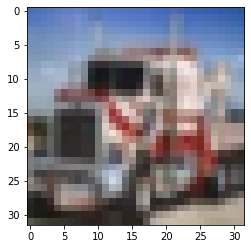

In [ ]:
index = np.random.randint(x_train.shape[0])
print('index: ', index)
img, label = x_train[index], y_train[index]
print('class:', label)
plt.imshow(img)

#### Preprocess

In [ ]:
# Normalization 0~1
x_train = x_train / 255.
x_val = x_val / 255.

# ont-hot encoding
y_train = utils.to_categorical(y_train, num_classes=num_classes)
y_val = utils.to_categorical(y_val, num_classes=num_classes)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

#### Build Model

In [ ]:
# 1
inputs = layers.Input(shape=(img_size, img_size, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
prediction = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0     

#### Training

In [ ]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
logs = model.fit(x_train, y_train,
                batch_size=64,
                epochs=10,
                verbose=1,
                validation_data=(x_val, y_val))

Epoch 1/10
782/782 [==============================] - 39s 8ms/step - loss: 2.2155 - accuracy: 0.1701 - val_loss: 1.9156 - val_accuracy: 0.3085
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.8112 - accuracy: 0.3536 - val_loss: 1.9097 - val_accuracy: 0.3404
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 1.5953 - accuracy: 0.4338 - val_loss: 1.5606 - val_accuracy: 0.4369
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4487 - accuracy: 0.4864 - val_loss: 1.6162 - val_accuracy: 0.4156
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.3411 - accuracy: 0.5247 - val_loss: 1.3089 - val_accuracy: 0.5257
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 1.2417 - accuracy: 0.5616 - val_loss: 1.3436 - val_accuracy: 0.5213
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 1.1609 - accuracy: 0.5893 - val_loss: 1.3181 - val_accuracy: 0.5291
Epoch

#### Logs

In [ ]:

history = logs.history

Text(0.5, 1.0, 'accuracy')

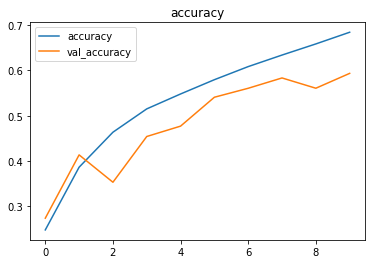

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

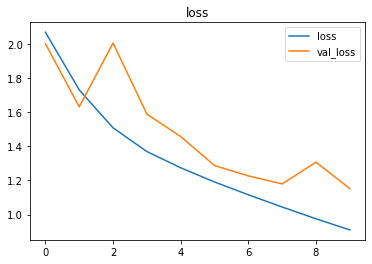

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

#### Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = np.argmax(y_val, axis=-1)
prediction = model.predict(x_val)
y_pred = np.argmax(prediction, axis=-1)

print(y_true.shape, y_pred.shape)

(10000,) (10000,)


In [ ]:
# classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1000
           1       0.76      0.69      0.73      1000
           2       0.37      0.65      0.47      1000
           3       0.43      0.38      0.41      1000
           4       0.52      0.60      0.56      1000
           5       0.52      0.52      0.52      1000
           6       0.70      0.63      0.66      1000
           7       0.84      0.53      0.65      1000
           8       0.81      0.61      0.69      1000
           9       0.79      0.55      0.65      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.60     10000
weighted avg       0.63      0.59      0.60     10000



In [ ]:
# Confusion matrix:
#   row: Ground truth
#   column: predict
print(confusion_matrix(y_true, y_pred))

[[766  12 109  15  18   9  14   5  38  14]
 [ 64 692  63  29  10   8  11   3  32  88]
 [ 58   3 654  51 128  44  40  14   7   1]
 [ 24   8 198 380  90 197  78  12   8   5]
 [ 38   3 191  42 600  36  52  29   8   1]
 [ 13   2 166 166  71 524  30  19   6   3]
 [  7   3 162  66  75  45 631   2   6   3]
 [ 28   1 129  62 119 103  16 527   4  11]
 [201  43  54  20  27  19   6   1 609  20]
 [ 99 141  63  44  16  15  20  15  36 551]]


#### Save model

In [ ]:
# 1. save whole model and weights
model.save('my_model.h5')
model2 = models.load_model('my_model.h5')